# STAT207 Mini-Project #1 - ITALIAN RENT PRICES


ANDREA LISCI

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Introduction

### In recent times Italy has become a famous tourist destination for many people. Every year millions of tourists decide to spend a lot of their time exploring the most important cities of the country. Cities like Milan and Rome are always flooding with people from around the world, tourists or students. With this in mind and considering the high demand for houses to rent, we might want to know how rent prices change based on different variables. As a tourist who wants to spend time in a particular city or as an incoming student in one of Italy's Universities finding a house that's compatible with your requests is really important, so: how does the relationship between prices and number of rooms change in different regions?

## 2. Dataset Discussion

### In order to do so I'm going to analyze a dataset composed of Italy house prices. The dataset was downloaded from Kaggle on semptember 19 2023 (https://www.kaggle.com/datasets/tommasoramella/italy-house-prices?resource=download&select=rents_clean.csv), it contains rents prices, with this variables:
* regione : italian region in which the city is located
* citta : the city where the house is located
* quartiere : it's the city zone where the house is located
* prezzo : is the rent price of the house per month
* date_time : the time of when the rent price was recorded
* posti_auto : 1 if there are car parkings, 0 if there aren't
* bagni_per_stanza : number of bathrooms per room
* bagni : number of bathrooms
* stanze: number of rooms
* ultimo_piano : 1 if the house is on the last floor, 0 if it isn't
### The full dataset has 33 coloumns, the ones listed above are the first 10, the other 23 represent: the current state of the house, the energetic class, if it has sea view, centralized heating, the surface area, if it's furnished, if there's a balcony, a tv system, optic fibre, electric gates, a cantin, a common garden, a private garden, if it has an anti-theft device, if there's a swimming pool, if it's a villa, if it's an apartment, an attic, a loft or a mansard or if it's an entire property.

In [95]:
df = pd.read_csv('rents_clean.csv')
df.head()

,regione,citta,quartiere,prezzo,datetime,posti auto,bagni per stanza,bagni,stanze,ultimo piano,...,giardino privato,impianto allarme,portiere,piscina,villa,intera proprieta,appartamento,attico,loft,mansarda
0,NaN,Milano,Centrale,1800.0,2023-07-03,1,0.333333,1.0,3.0,0,...,0,0,0,0,0,0,1,0,0,0
1,NaN,Torino,Santa Rita,450.0,2023-07-03,0,0.500000,1.0,2.0,1,...,0,0,0,0,0,0,1,0,0,0
2,NaN,Padova,Prato della Valle - Pontecorvo,3200.0,2023-07-03,1,NaN,3.0,NaN,0,...,0,0,0,0,0,0,1,0,0,0
3,NaN,Firenze,Galluzzo,1700.0,2022-12-21,0,NaN,3.0,NaN,1,...,1,0,0,0,1,0,0,0,0,0
4,NaN,Monte Argentario,Località Poggio Pertuso,4000.0,2023-06-03,1,0.600000,3.0,5.0,0,...,1,0,0,0,1,0,0,0,0,0


### The dataset has this many rows:

In [96]:
n_rows = df.shape[0]
n_rows

126237

### The data for this dataset was collected between 2010 and 2023, it contains only the rent prices registered on the website Immobiliare.com, it's not complete with every rent price from 2010, there might be different rent prices on the market.

### Out of the 33 different variables in the dataset I'm going to analyze the rent prices (prezzo) in relation to the number of rooms (stanze) and the region (regione). How does the Relationship between prices ('prezzo') and number of rooms ('stanze') Change based on Different Values of 'regione' (region) in the Dataset?

## 3. Dataset Cleaning

### Before starting with the analysis, we have to clean our dataset. 

In [97]:
df.isna().sum()

regione                           12
citta                             15
quartiere                       7436
prezzo                          5729
datetime                           0
posti auto                         0
bagni per stanza               10853
bagni                           4191
stanze                          8635
ultimo piano                       0
stato                           8362
classe energetica              24300
vista mare                       112
riscaldamento centralizzato    18716
superficie                      9835
arredato                           0
balcone                            0
impianto tv                        0
esposizione esterna                0
fibra ottica                       0
cancello elettrico                 0
cantina                            0
giardino comune                    0
giardino privato                   0
impianto allarme                   0
portiere                           0
piscina                            0
v

### The function used highlights only the explicit missing values. I'm going to delete every row that contains at least one missing value

In [98]:
df_new = df.dropna()

In [99]:
df_new.dtypes

regione                         object
citta                           object
quartiere                       object
prezzo                         float64
datetime                        object
posti auto                       int64
bagni per stanza               float64
bagni                          float64
stanze                         float64
ultimo piano                     int64
stato                           object
classe energetica               object
vista mare                     float64
riscaldamento centralizzato    float64
superficie                     float64
arredato                         int64
balcone                          int64
impianto tv                      int64
esposizione esterna              int64
fibra ottica                     int64
cancello elettrico               int64
cantina                          int64
giardino comune                  int64
giardino privato                 int64
impianto allarme                 int64
portiere                 

### After deleting the explicit missing values we have to check for any implicit missing value by looking at the different value types. In this case every variable seems to have a coherent data type, so we can assume there are no implicit missing values.

### By deleting any row that contains at least one missing value, during our analysis, we are able to use only fully valid rows. The downside of deleting the NaN rows is that a large amount of valid data gets deleted too.

### The number of rows dropped after deleting missing values is:

In [100]:
n_rows = df.shape[0]-df_new.shape[0]
n_rows

54969

### Before proceiding with our research, we have to do a bit more data cleaning, we are going to check the outliers:

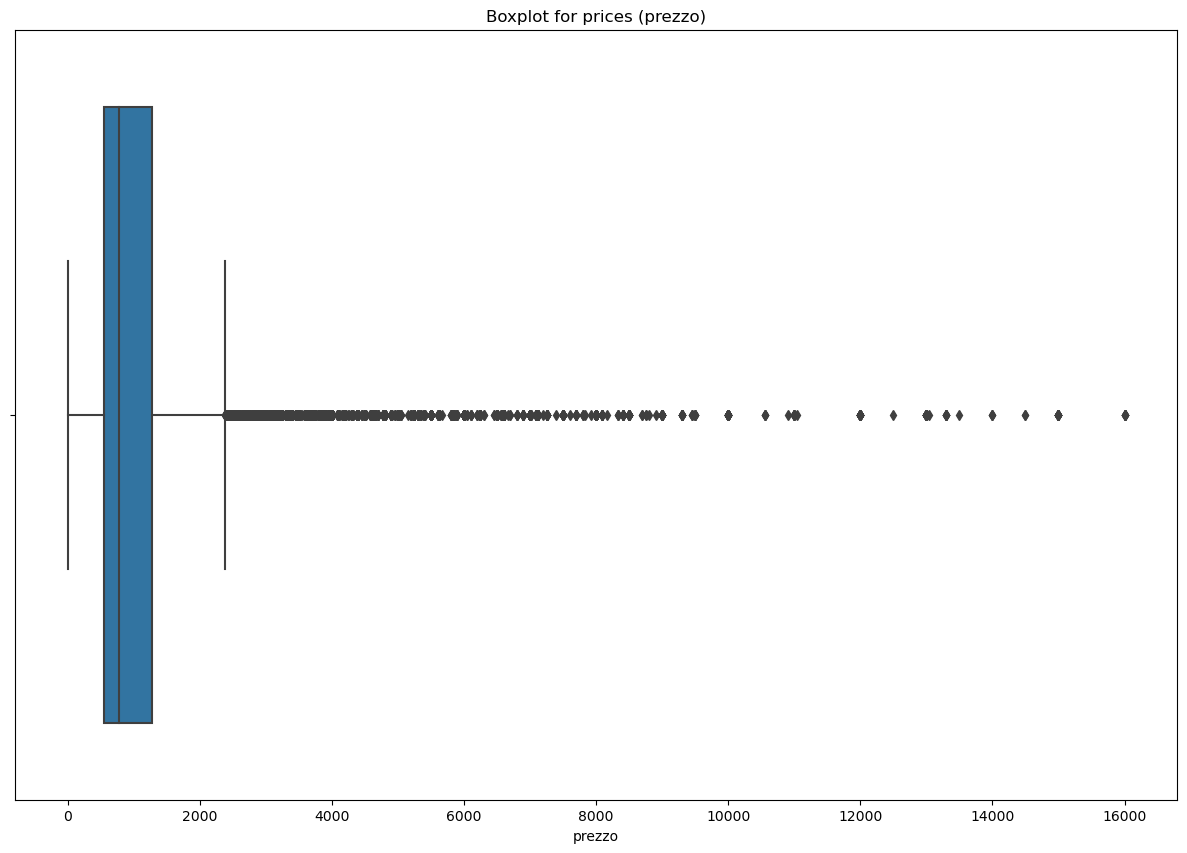

In [101]:
plt.figure(figsize=(15,10))
df_new = df_new[df_new.prezzo < 17000]
sns.boxplot(x = 'prezzo', data = df_new)
plt.title('Boxplot for prices (prezzo)')
plt.show()

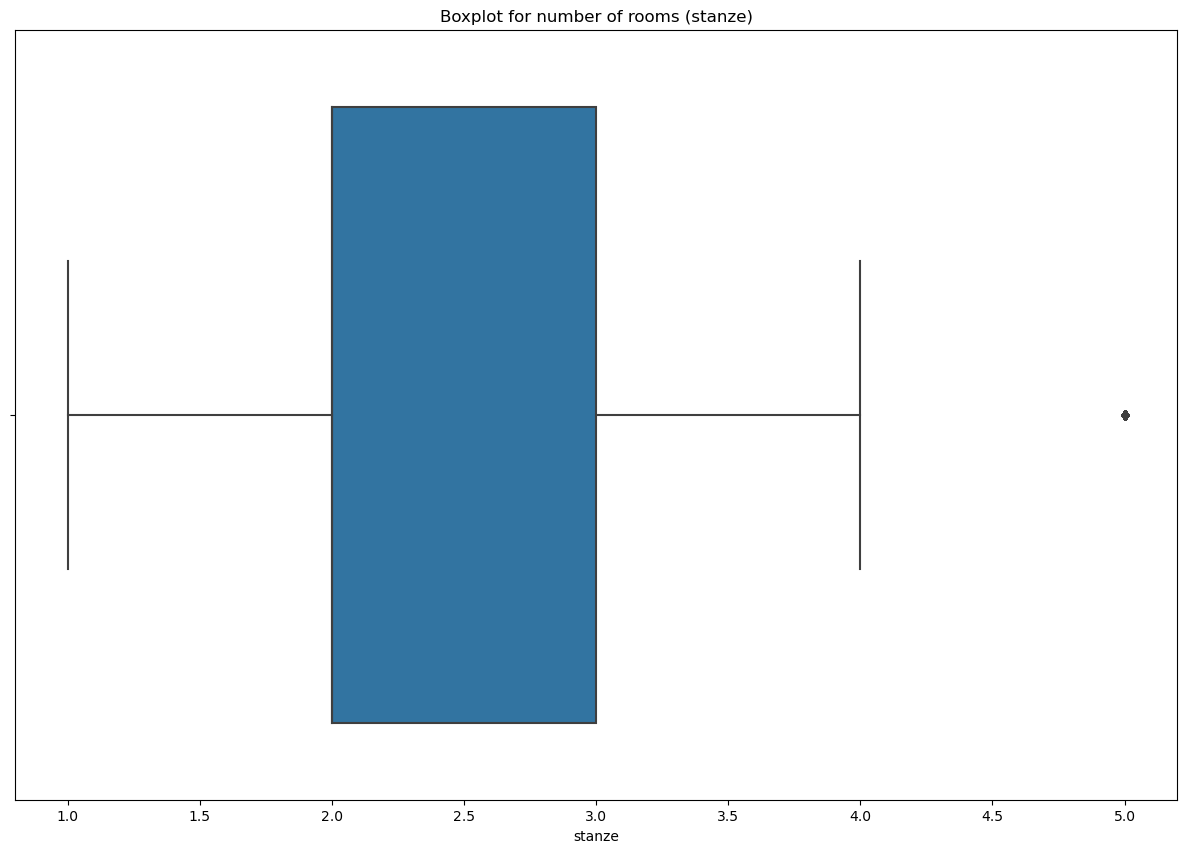

In [102]:
plt.figure(figsize=(15,10))
sns.boxplot(x = 'stanze', data = df_new)
plt.title('Boxplot for number of rooms (stanze)')
plt.show()

### So for the first boxplot I'm going to keep price values from 0 to 10000, eliminating only the really high outliers, and for the number of rooms ('stanze') I'm going to keep all the data.

In [103]:
df3 = df_new[(df_new['prezzo'] < 10000)]
df3

,regione,citta,quartiere,prezzo,datetime,posti auto,bagni per stanza,bagni,stanze,ultimo piano,...,giardino privato,impianto allarme,portiere,piscina,villa,intera proprieta,appartamento,attico,loft,mansarda
12,lombardia,Milano,Isola,1800.0,2023-07-03,0,0.500000,1.0,2.0,1,...,1,0,0,0,0,0,1,0,0,0
13,piemonte,Torino,Via della Rocca,500.0,2023-08-03,0,1.000000,1.0,1.0,0,...,0,0,0,0,0,0,1,0,0,0
15,emilia-romagna,Bologna,Saragozza fuori Porta,825.0,2023-08-03,1,0.500000,1.0,2.0,0,...,0,0,0,0,0,0,1,0,0,0
16,liguria,Genova,Prè,550.0,2023-08-03,0,0.333333,1.0,3.0,0,...,0,0,0,0,0,0,1,0,0,0
19,calabria,Catanzaro,Sant'Antonio - De Filippis,500.0,2023-06-03,0,0.333333,1.0,3.0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126231,friuli-venezia-giulia,Trieste,Chiarbola - Ponziana,700.0,2023-07-27,0,0.250000,1.0,4.0,0,...,0,0,0,0,0,0,1,0,0,0
126232,friuli-venezia-giulia,Trieste,Largo Barriera - Ospedale Maggiore,500.0,2023-07-25,0,0.500000,1.0,2.0,0,...,0,0,0,0,0,0,1,0,0,0
126234,friuli-venezia-giulia,Trieste,Giardino Pubblico,750.0,2023-07-26,0,1.333333,4.0,3.0,0,...,0,0,0,0,0,0,1,0,0,0
126235,friuli-venezia-giulia,Trieste,Borgo Teresiano,1200.0,2023-07-26,0,0.333333,1.0,3.0,0,...,0,0,0,0,0,0,1,0,0,0


### By dropping the outliers we are going to have a cleaner dataframe, we are going to get less skewed results. However, by dropping outliers we are also dropping rows of valid data in the dataframe and the visualization (for example, a scatterplot) could be more readable with more data. We could detect other outliers by creating a scatterplot of 'prezzo' and 'stanze':

<Figure size 1500x1000 with 0 Axes>

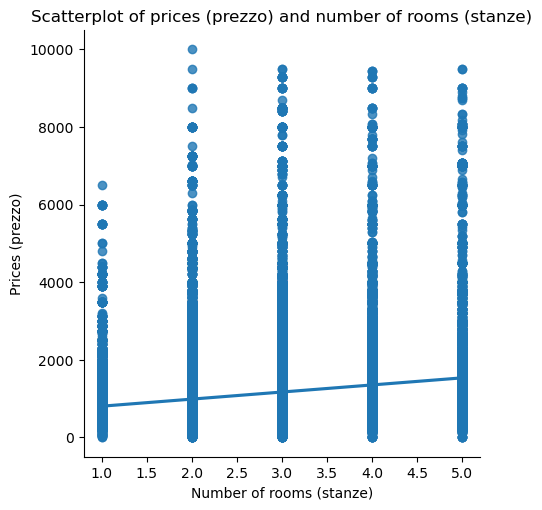

In [104]:
plt.figure(figsize=(15,10))
sns.lmplot(x = 'stanze', y = 'prezzo', data = df3)
plt.title('Scatterplot of prices (prezzo) and number of rooms (stanze)')
plt.xlabel('Number of rooms (stanze)')
plt.ylabel('Prices (prezzo)')
plt.show()

### In order to have a better visualization with a scatterplot, I decided not to delete any other outlier.

### The numbers of rows I dropped is:

In [105]:
n_rows_o = df_new.shape[0]-df3.shape[0]
n_rows_o

142

In [106]:
df3['regione'].value_counts()

regione
lombardia                17347
lazio                    12963
piemonte                  9090
emilia-romagna            8081
veneto                    4320
toscana                   3739
liguria                   3724
campania                  3517
sicilia                   1858
marche                    1549
umbria                    1431
puglia                    1092
abruzzo                    755
trentino-alto-adige        435
calabria                   370
sardegna                   229
friuli-venezia-giulia      142
valle-d-aosta              111
basilicata                 109
molise                      93
emilia-Romagna              53
trieste                     18
catanzaro                   16
genova                       7
napoli                       2
palermo                      2
venezia                      2
Liguria                      1
milano                       1
torino                       1
bari                         1
l-aquila                     1


### After running a value count for the number of observarions for each region, I decided to select the three regions with the most amount of rented houses: lombardia (Lombardy), lazio and piemonte.

In [107]:
df2_raw = df3[(df3.regione == 'lombardia') | (df3.regione == 'lazio') | (df3.regione == 'piemonte')]
df2_raw

,regione,citta,quartiere,prezzo,datetime,posti auto,bagni per stanza,bagni,stanze,ultimo piano,...,giardino privato,impianto allarme,portiere,piscina,villa,intera proprieta,appartamento,attico,loft,mansarda
12,lombardia,Milano,Isola,1800.0,2023-07-03,0,0.500000,1.0,2.0,1,...,1,0,0,0,0,0,1,0,0,0
13,piemonte,Torino,Via della Rocca,500.0,2023-08-03,0,1.000000,1.0,1.0,0,...,0,0,0,0,0,0,1,0,0,0
493,piemonte,Torino,Quadrilatero Romano,1200.0,2023-08-03,0,0.400000,2.0,5.0,0,...,0,0,0,0,0,0,1,0,0,0
494,piemonte,Torino,Cittadella,350.0,2023-08-03,0,1.000000,1.0,1.0,0,...,0,0,0,0,0,0,1,0,0,0
495,piemonte,Torino,Cittadella,350.0,2023-08-03,0,1.000000,1.0,1.0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126187,lazio,Roma,Ardeatino - Montagnola,950.0,2023-07-27,0,0.500000,1.0,2.0,1,...,0,0,0,0,0,0,1,0,0,0
126188,lazio,Roma,Salario - Porta Pia,900.0,2023-07-27,0,0.500000,1.0,2.0,0,...,0,0,0,0,0,0,1,0,0,0
126189,lazio,Roma,Pinciano - Villa Ada,700.0,2023-07-27,0,1.000000,1.0,1.0,0,...,1,0,0,0,0,0,1,0,0,0
126192,lazio,Roma,Conca d'Oro - Valli,1100.0,2023-07-19,0,0.333333,1.0,3.0,0,...,0,0,0,0,0,0,1,0,0,0


### The number of rows dropped is:

In [108]:
rows_reg = df_new.shape[0]-df2_raw.shape[0]
rows_reg

31802

## 4. <u>Research Question</u>: How does the Relationship between prices ('prezzo') and number of rooms ('stanze') Change based on Different Values of 'regione' (region) in the Dataset?

### Out of the 33 coloumns, we just need 'regione', 'prezzo' and 'stanze':

In [109]:
df2 = df2_raw[['regione','prezzo','stanze']]
df2

,regione,prezzo,stanze
12,lombardia,1800.0,2.0
13,piemonte,500.0,1.0
493,piemonte,1200.0,5.0
494,piemonte,350.0,1.0
495,piemonte,350.0,1.0
...,...,...,...
126187,lazio,950.0,2.0
126188,lazio,900.0,2.0
126189,lazio,700.0,1.0
126192,lazio,1100.0,3.0


### After cleaning the dataset, we are ready to start our analysis:

<Figure size 1500x1000 with 0 Axes>

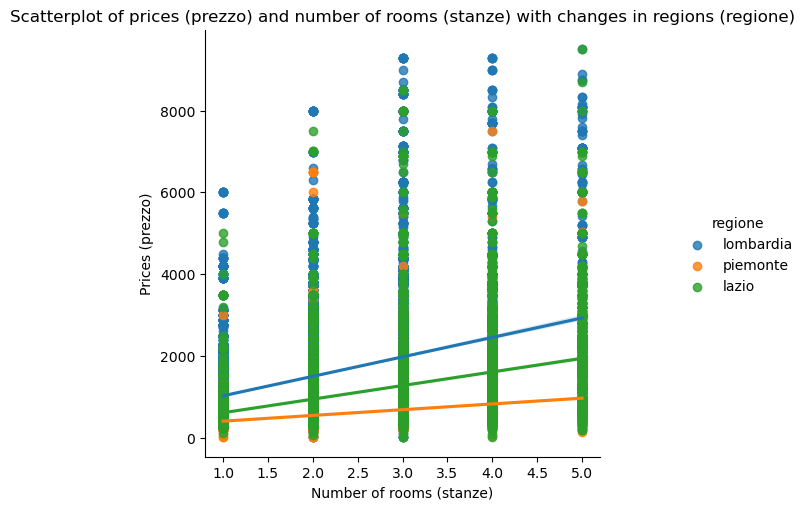

In [110]:
plt.figure(figsize=(15,10))
sns.lmplot(x = 'stanze', y = 'prezzo', hue = 'regione', data = df2)
plt.title('Scatterplot of prices (prezzo) and number of rooms (stanze) with changes in regions (regione)')
plt.xlabel('Number of rooms (stanze)')
plt.ylabel('Prices (prezzo)')
plt.show()

In [111]:
df2.groupby(['regione']).corr()

prezzo    stanze
regione                             
lazio     prezzo  1.000000  0.391805
          stanze  0.391805  1.000000
lombardia prezzo  1.000000  0.347665
          stanze  0.347665  1.000000
piemonte  prezzo  1.000000  0.333364
          stanze  0.333364  1.000000

### Looking at the scatterplot and the correlations table, we can determine that:
* All of the relationships are positive
* All of the relationships are linear
* The relationship between price (prezzo) and number of rooms (stanze) is stronger in the Lazio region (0.391805), after that there's the Lombardia region (0.347665), then Piemonte (0.333364)
* All of the relationships have at least one outlier
* The Lombardia slope seems to be the steeper one, then Lazio and Piemonte
### Since the slopes are all different, we can say that there's an interaction between region and number of rooms in their effect on the price.

### Based on the scatterplot, the correlation table and the answers to the 5 questions above, we can say that in the Lombardia region the rent price increases more with the increment in the number of rooms then in the other regions, followed by Lazio and then Piemonte.

## 5. Conclusion

### After analysing our dataset, we are now able to determin which one of the three regions is the best suit for us if we have no preferences regarding the regions and we only look at the number of rooms. This analysis still contains a large number of outliers for the price variable (prezzo), it takes into account a large number of observations and the results may be skewed. When thinking about university students, for example, this analysis contains a lot of price values that might be considered too high when looking for an apartment to rent. 

### When analysing how the correlation between price and number of rooms changes in different regions, we might want to have an estimate of a house rent exspense based on the location and the number of rooms. The next step in the analysis might be a linear regression model with 'prezzo' (prices) as our response variable and 'regione' (region) along with 'stanze' (number of rooms) as our explanatory variables.